<a href="https://colab.research.google.com/github/tangani/Machine-learning-Models/blob/main/Feedback_Prize_Evaluating_Student_Writing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Feedback Prize - Evaluating Student Writing](https://www.kaggle.com/competitions/feedback-prize-effectiveness/data)

## Helper links:
1. [Concrete NLP Tutorial GitHub](https://github.com/hundredblocks/concrete_NLP_tutorial/blob/master/NLP_notebook.ipynb)
2. [How to solve 90% of NLP problems: a step-by-step guide](https://blog.insightdatascience.com/how-to-solve-90-of-nlp-problems-a-step-by-step-guide-fda605278e4e)

## Import libraries

In [ ]:
# Main libraries
import sklearn
import keras
import nltk
import tensorflow as tf

# Dataframe handling 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# NLP specific libraries 
import re
import codecs
from nltk.tokenize import RegexpTokenizer

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Get Data and Explore

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle_Datasets/feedback-prize-2021-Evaluating-Student-Writing/train.csv')

In [ ]:
df.head()

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...


In [ ]:
df['discourse_id'] = df['discourse_id'].apply(np.int64)
df.head()

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring,tokens
0,423A1CA112E2,1622627660524,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...,"[Modern, humans, today, are, always, on, their..."
1,423A1CA112E2,1622627653021,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59,"[They, are, some, really, bad, consequences, w..."
2,423A1CA112E2,1622627671020,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75,"[Some, certain, areas, in, the, United, States..."
3,423A1CA112E2,1622627696365,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...,"[When, people, have, phones, they, know, about..."
4,423A1CA112E2,1622627759780,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...,"[Driving, is, one, of, the, way, how, to, get,..."


In [ ]:
df.tail()

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
144288,4C471936CD75,1.618153e+12,2234.0,3203.0,if I'm not sure what college I want to attend...,Evidence,Evidence 2,386 387 388 389 390 391 392 393 394 395 396 39...
144289,4C471936CD75,1.618153e+12,3221.0,4509.0,seeking multiple opinions before making a har...,Evidence,Evidence 3,576 577 578 579 580 581 582 583 584 585 586 58...
144290,4C471936CD75,1.618025e+12,4510.0,4570.0,it is better to seek multiple opinions instead...,Position,Position 1,828 829 830 831 832 833 834 835 836 837 838
144291,4C471936CD75,1.618025e+12,4570.0,4922.0,The impact of asking people to help you make a...,Evidence,Evidence 4,839 840 841 842 843 844 845 846 847 848 849 85...
144292,4C471936CD75,1.618025e+12,4935.0,5825.0,there are many other reasons one might want to...,Concluding Statement,Concluding Statement 1,905 906 907 908 909 910 911 912 913 914 915 91...


In [ ]:
df.describe()

,discourse_id,discourse_start,discourse_end
count,1.442930e+05,144293.000000,144293.000000
mean,1.618936e+12,959.818855,1200.791203
std,2.491895e+09,921.054471,1010.457306
min,1.614351e+12,0.000000,3.000000
25%,1.616884e+12,277.000000,422.000000
50%,1.618862e+12,685.000000,927.000000
75%,1.621222e+12,1404.000000,1696.000000
max,1.623614e+12,7510.000000,7947.000000


In [ ]:
df.shape

(144293, 8)

In [ ]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144293 entries, 0 to 144292
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  144293 non-null  object 
 1   discourse_id        144293 non-null  float64
 2   discourse_start     144293 non-null  float64
 3   discourse_end       144293 non-null  float64
 4   discourse_text      144293 non-null  object 
 5   discourse_type      144293 non-null  object 
 6   discourse_type_num  144293 non-null  object 
 7   predictionstring    144293 non-null  object 
dtypes: float64(3), object(5)
memory usage: 8.8+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


* No Nulls

## Preparing the data

* Tokenizing sentences  into list of separate words
* Creating train test split
Inspect data to validate results

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
df['tokens'] = df['discourse_text'].apply(tokenizer.tokenize)
df.head()

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring,tokens
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...,"[Modern, humans, today, are, always, on, their..."
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59,"[They, are, some, really, bad, consequences, w..."
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75,"[Some, certain, areas, in, the, United, States..."
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...,"[When, people, have, phones, they, know, about..."
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...,"[Driving, is, one, of, the, way, how, to, get,..."


### Inspecting Data Indepth

In [ ]:
all_words = [word for tokens in df['tokens'] for word in tokens]


In [ ]:
sentense_lengths = [len(tokens) for tokens in df['tokens']]

In [ ]:
vocab = sorted(list(set(all_words)))

In [ ]:
print(f'{len(all_words)} words in total, with a vocabulary size of {len(vocab)}')

6345354 words in total, with a vocabulary size of 57303


In [ ]:
print(f'Max sentense  length is {max(sentense_lengths)}')

Max sentense  length is 848


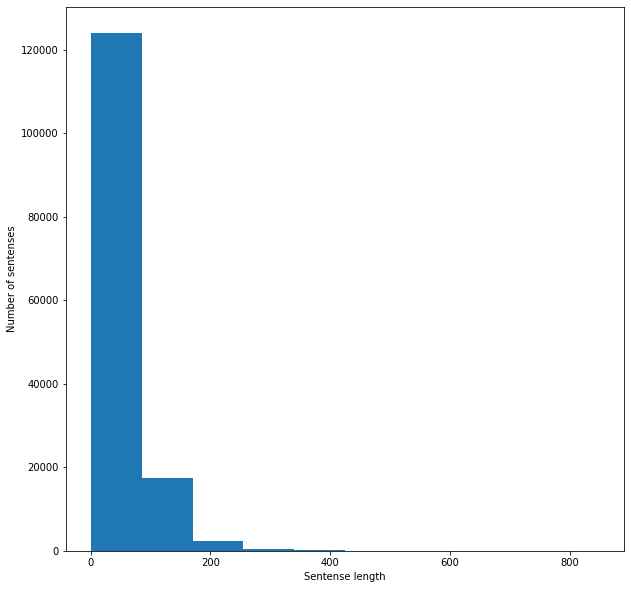

In [ ]:
fig = plt.figure(figsize=(10, 10))
plt.xlabel('Sentense length')
plt.ylabel('Number of sentenses')
plt.hist(sentense_lengths)
plt.show()

## Bag of words counts

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
def cv(data):
    count_vectorizer = CountVectorizer()
    emb = count_vectorizer.fit_transform(data)
    return emb, count_vectorizer

In [ ]:
list_corpus = clean_question